In [162]:
import pandas as pd
from datetime import datetime
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
from pprint import pprint

In [163]:
def printImg(df, filename):
    df_styled = df.style.background_gradient() #adding a gradient based on values in cell
    dfi.export(df_styled, filename, max_cols=-1, max_rows=-1)

playerAlias = {
    '76561198265344418': '心情在变',
    '76561198086330270': 'Pangpang',
    '76561198089895773': '张东升杀疯了',
    '76561198840251113': '卡卡罗特丶',
    '76561198149571378': '蓝枫',
    '76561198102247968': '真的假的',
    '76561198071455445': 'inflame',
    '76561198042593402' : 'Faith',
    '76561198100443877' : 'Axx',
    '76561198050403391' : '雕哥',
    '76561198041195466' : 'Nono',
    '76561198103102185' :  '蛋饼',
    '76561198987708490' :  'Just',
    '76561198412855736' :  '低手坟墓',
    '76561198141216409' :  '仔子',
    '76561198190932269' :  '天启骑士',
    '76561198046300284' :  'DC',
    '76561198210619341' :  'Yuzu',
    '76561198090681764' :  '霸气',
    '76561198050296953' :  'Ch',
    '76561198061944707' :  '小刘',
    '76561198133645563' :  'Afuwhy',
    '76561198047050252' :  '老蔡',
    '76561198073971421' :  'ZSMJ',
    '76561198048774243' :  'Hao',
    '76561198061149436' :  '狗哥',
    '76561198107128764' :  '皮露露可',
    '76561198062910293' :  'Iceice',
    '76561198068647788' :  '塞拉',
    '76561198049637316' :  '谢彬',
    '76561198051157922' :  '龙神',
    '76561198050310737' :  '枫哥',
    '76561198109718719' :  '烈女',
    '76561198049423334' :  '大mu',
    '76561198051147609' :  '宝哥',
    '76561198069346783' :  '566'
}

# for SteamID only
playerList = [*playerAlias]

### 读取文件
shape = (1531, 15), 玩家数据在 team_detail 列

In [164]:
df = pd.read_json('match_detail.json').T
df.index = [ round(x/10e8) for x in df.index.astype(int).tolist()]  # index 被默认转成了timestamp,再给转回来
df.shape

(1531, 15)

In [165]:
df.head(2)

,pwa_match_index,win_team,steamNickname,start_timestamp,match_id,pwa_score_change,is_win,pwa_match_id,game_type,duration,team_detail,end_timestamp,pwa_score_after,steamAvatar,pwa_pre_rank
6679959318,None,dire,None,1658917673,6679959318,None,None,None,0,2304,"{'radiant': {'team_damage': 173429, 'team_net_...",1658919977,None,None,None
6679908006,None,radiant,None,1658914566,6679908006,None,None,None,0,2421,"{'radiant': {'team_damage': 208516, 'team_net_...",1658916987,None,None,None


In [166]:
for game_id, game in df.iterrows():
    # 检查每一场游戏
    game = game.to_dict()   # 转化成dict
    break


In [167]:


def parseWinRate(game, playerId):
    
    isDireWin = game['win_team'] == 'dire'
    dt = datetime.fromtimestamp(game['end_timestamp'])

    players = {}    # store player detail
    # for radiant side, 5 players
    for player in game['team_detail']['radiant']['player_detail']:
        steamId64 = player['id_steam64']
        players[steamId64] = player

    # for dire side, 5 players
    for player in game['team_detail']['dire']['player_detail']:
        steamId64 = player['id_steam64']
        players[steamId64] = player

    # skip if the queried player not in this game
    if playerId not in players:
        return {}

    # if present in this game, return datetime and 1 if wins, 0 if loses

    return {dt : players[playerId]['is_win'] }

In [168]:
win_rate = {}


for game_id, game in df.iterrows():
    # 检查每一场游戏
    game = game.to_dict()   # 转化成dict
    
    # check winrate and insert into dict
    win_rate.update( parseWinRate(game, '76561198050310737' ) )




In [198]:
wr.describe()

count    1044.000000
mean        0.446360
std         0.497353
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: win_rate, dtype: float64

In [197]:
wr

2022-07-27 09:41:24    0
2022-07-27 08:58:15    1
2022-07-27 07:06:02    0
2022-07-27 06:12:51    1
2022-07-27 05:18:05    1
                      ..
2022-06-03 06:39:37    0
2022-05-01 09:34:54    1
2022-04-25 07:21:31    1
2022-04-20 12:57:44    0
2022-07-26 14:41:15    1
Name: win_rate, Length: 1044, dtype: int64

In [169]:
wr = pd.Series(win_rate, name='win_rate')
wr

2022-07-27 09:41:24    0
2022-07-27 08:58:15    1
2022-07-27 07:06:02    0
2022-07-27 06:12:51    1
2022-07-27 05:18:05    1
                      ..
2022-06-03 06:39:37    0
2022-05-01 09:34:54    1
2022-04-25 07:21:31    1
2022-04-20 12:57:44    0
2022-07-26 14:41:15    1
Name: win_rate, Length: 1044, dtype: int64

In [170]:
x = pd.DataFrame(wr)
x.sort_index(inplace=True, ascending=False)

In [171]:
x.head(20)

,win_rate
2022-07-27 09:41:24,0
2022-07-27 08:58:15,1
2022-07-27 07:06:02,0
2022-07-27 06:12:51,1
2022-07-27 05:18:05,1
2022-07-27 04:23:56,0
2022-07-26 14:41:15,1
2022-07-26 13:32:06,1
2022-07-26 10:06:47,0
2022-07-26 08:51:14,0


In [202]:
x.resample('1d').agg('mean').shape

(116, 1)

In [172]:
result = x.resample('1d').agg('mean')

In [173]:
printImg(result, 'result.png')

/opt/homebrew/lib/python3.9/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
objc[55382]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22c1f56a0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/102.0.5005.61/Libraries/libGLESv2.dylib (0x10e4ed368). One of the two will be used. Which one is undefined.
[0728/231811.768341:INFO:headless_shell.cc(660)] Written to file /var/folders/kb/m0wnj95x6v557ckp8gk0_f3r0000gn/T/tmpcojc2epw/temp.png.
objc[55396]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x22c1f56a0) and /Applications/Google Chrome.app/Contents/Frameworks/Goo

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

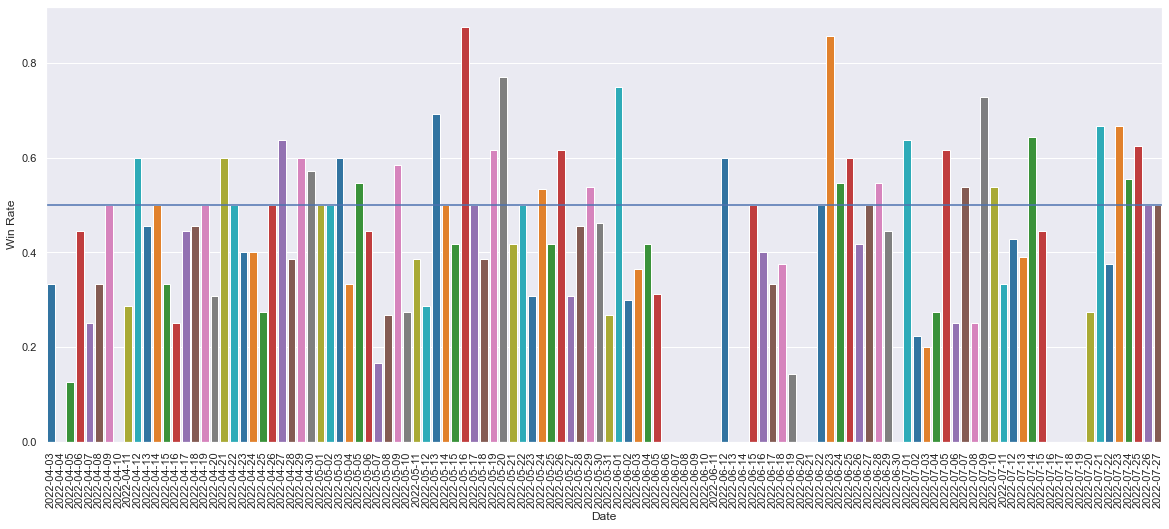

In [175]:
sns.set(rc={'figure.figsize':(20,8)})
graph = sns.barplot(x='index', y="win_rate", palette ='tab10', data=result.reset_index())
graph.axhline(0.5)

plt.xlabel('Date')
plt.ylabel('Win Rate')
plt.xticks(rotation="90")
x_dates = result.reset_index()['index'].dt.strftime('%Y-%m-%d').sort_values().unique()
graph.set_xticklabels(labels=x_dates, rotation=90)
plt.show()

In [192]:
result = x.resample('1d').agg('mean')

result = result.dropna()

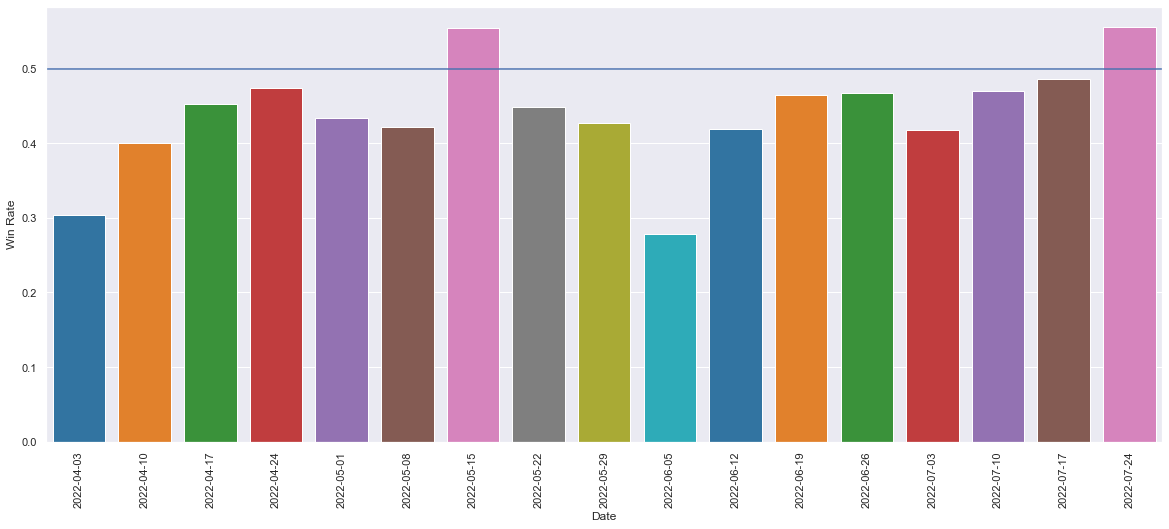

In [196]:
result = x.resample('7d').agg('mean')

graph = sns.barplot(x='index', y="win_rate", palette ='tab10',  data=result.reset_index())
graph.axhline(0.5)

plt.xlabel('Date')
plt.ylabel('Win Rate')
plt.xticks(rotation="90")
x_dates = result.reset_index()['index'].dt.strftime('%Y-%m-%d').sort_values().unique()
graph.set_xticklabels(labels=x_dates, rotation=90)
plt.show()